In [1]:
using PhyloClustering
using PhyloNetworks
using Distances
using DataStructures
using MultivariateStats

In [2]:
# Concatenate all files into one text file with all gene trees.
trees = HybridNetwork[]
for i in 0:371
    tree = readTopology("../../baobabs/" * string(i) * ".treefile")
    if length(sort(tipLabels(tree)))!= 9
        continue
    end
    push!(trees,tree)
end
writeMultiTopology(trees, "../../baobabs/trees.trees")

In [2]:
origin = readMultiTopology("../../baobabs/trees.trees")
trees = print_bipartition(origin, 9);
trees = standardize_tree(trees);

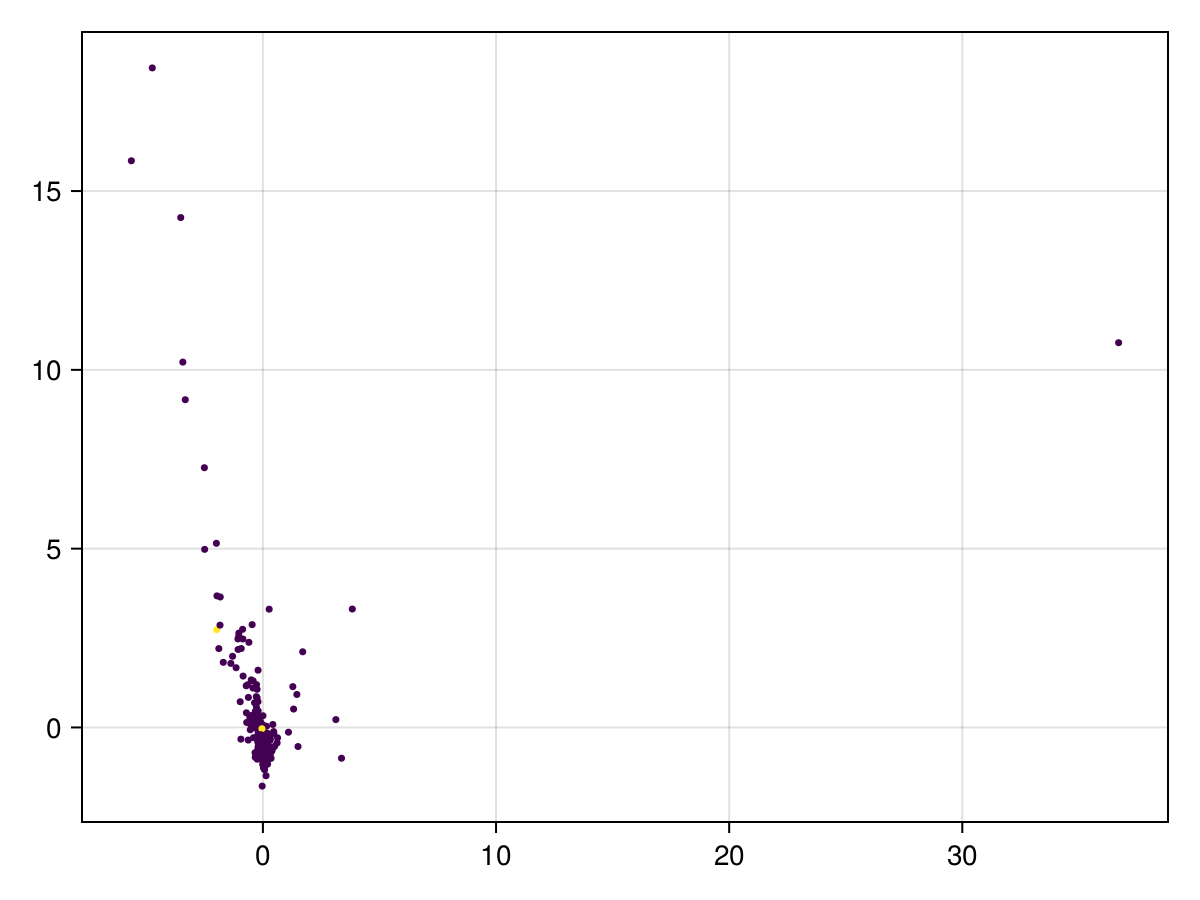

In [3]:
label = kmeans_label(trees, 2)
plot_clusters(trees, label)

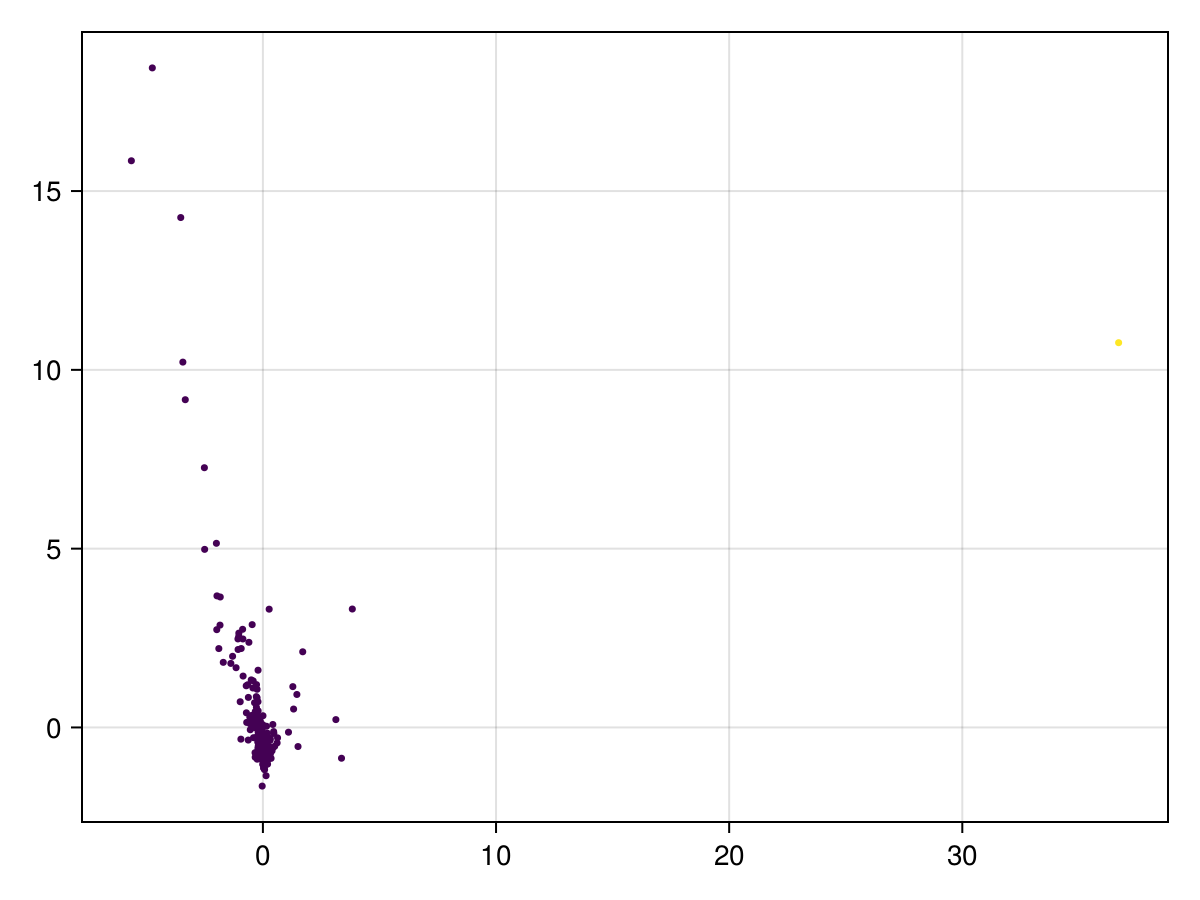

In [4]:
matrix = pairwise(Euclidean(), trees, dims=2)
label = hc_label(matrix, 2)
plot_clusters(trees, label)

In [5]:
PCA_model = fit(PCA, trees, maxoutdim = 2);
PCA_data = predict(PCA_model,trees)
outlier = []
outlier_PCA = []
index = []
for i in 1:size(PCA_data, 2)
    if PCA_data[:,i][2] >10
        append!(outlier, [origin[i]])
        append!(outlier_PCA, [PCA_data[:,i]])
        append!(index,i)
    end
end

index = unique(index)
deleteat!(origin, (i for i in index));
display(outlier_PCA)
display(outlier)

5-element Vector{Any}:
 [-4.743697563197281, 18.443689332854202]
 [-5.6423771367401505, 15.846763951496026]
 [-3.433411194988615, 10.216404173928009]
 [36.70575161730656, 10.75928081447032]
 [-3.523993160951969, 14.259148324753404]

5-element Vector{Any}:
 HybridNetwork, Rooted Network
15 edges
16 nodes: 9 tips, 0 hybrid nodes, 7 internal tree nodes.
tip labels: Adi001, Aga001, Age001, Aru001, ...
(Adi001:0.021,((((Aga001:0.002,(Age001:0.022,Aru001:0.015):0.024):0.013,Ape001:0.013):0.025,(Ama006:0.042,Smi165:0.069):0.03):0.007,Asu001:0.013):0.017,Aza037:0.01);

 HybridNetwork, Rooted Network
15 edges
16 nodes: 9 tips, 0 hybrid nodes, 7 internal tree nodes.
tip labels: Adi001, Aga001, Ape001, Age001, ...
(Adi001:0.021,(Aga001:0.008,Ape001:0.011):0.0,((Age001:0.073,(Aru001:0.011,Asu001:0.011):0.056):0.055,((Ama006:0.006,Aza037:0.005):0.038,Smi165:0.008):0.012):0.007);

 HybridNetwork, Rooted Network
15 edges
16 nodes: 9 tips, 0 hybrid nodes, 7 internal tree nodes.
tip labels: Adi001, Aga001, Age001, Ape001, ...
(Adi001:0.016,((((Aga001:0.004,Age001:0.066):0.163,Ape001:0.074):0.0,Aru001:0.01):0.003,((Ama006:0.032,Asu001:0.025):0.006,Smi165:0.115):0.026):0.004,Aza037:0.009);

 HybridNetwork, Rooted Network
15 edges
16

In [6]:
trees = print_bipartition(origin, 9);
trees = standardize_tree(trees);

Accumulator{Int64, Int64} with 2 entries:
  2 => 22
  1 => 341

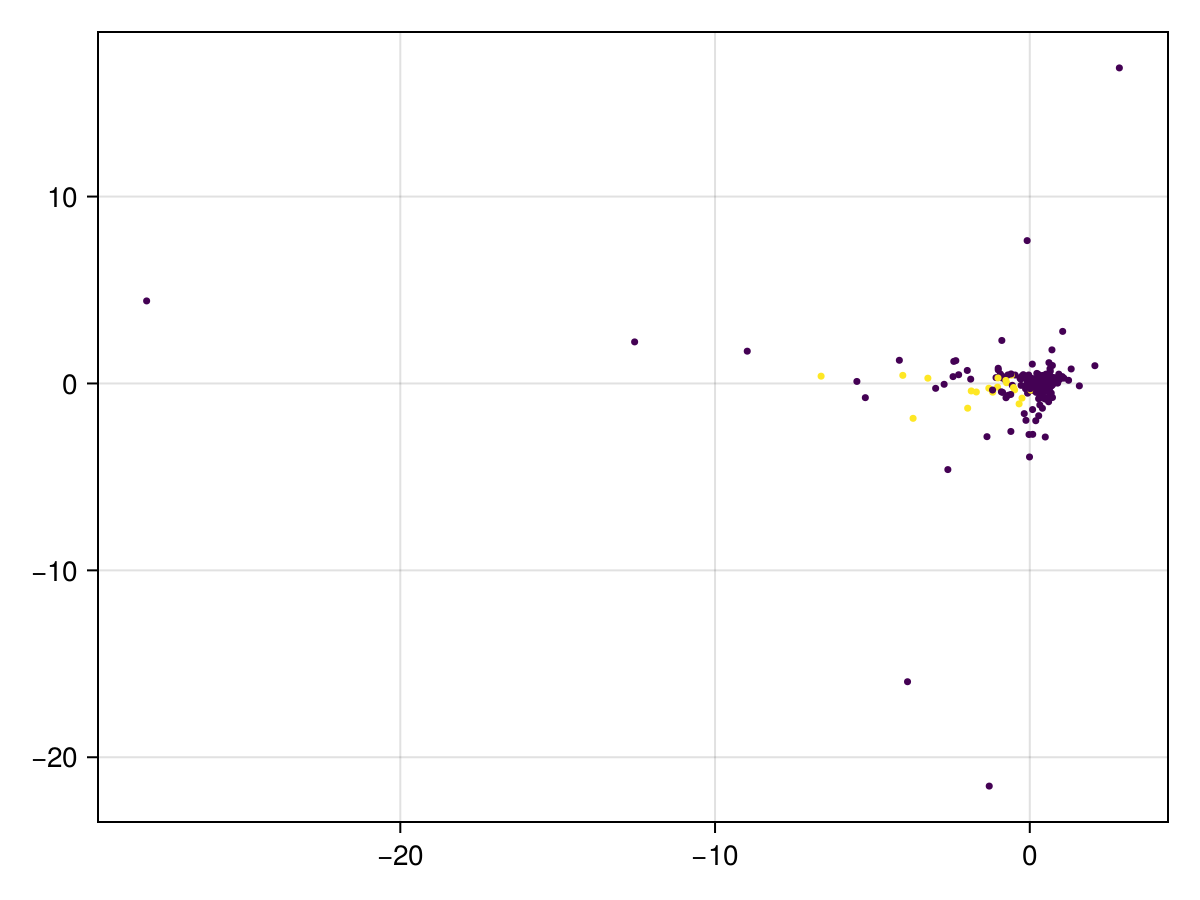

In [16]:
label = kmeans_label(trees, 2)
display(counter(label))
plot_clusters(trees, label)

In [17]:
cluster_1 = Vector{HybridNetwork}()
cluster_2 = Vector{HybridNetwork}() 
for i in 1:length(origin)
    if label[i] == 1
        push!(cluster_1,origin[i])
    else
        push!(cluster_2,origin[i])
    end
end

In [18]:
writeMultiTopology(cluster_1, "../../baobabs/kmeans_1.trees")
writeMultiTopology(cluster_2, "../../baobabs/kmeans_2.trees")

Accumulator{Int64, Int64} with 2 entries:
  2 => 3
  1 => 360

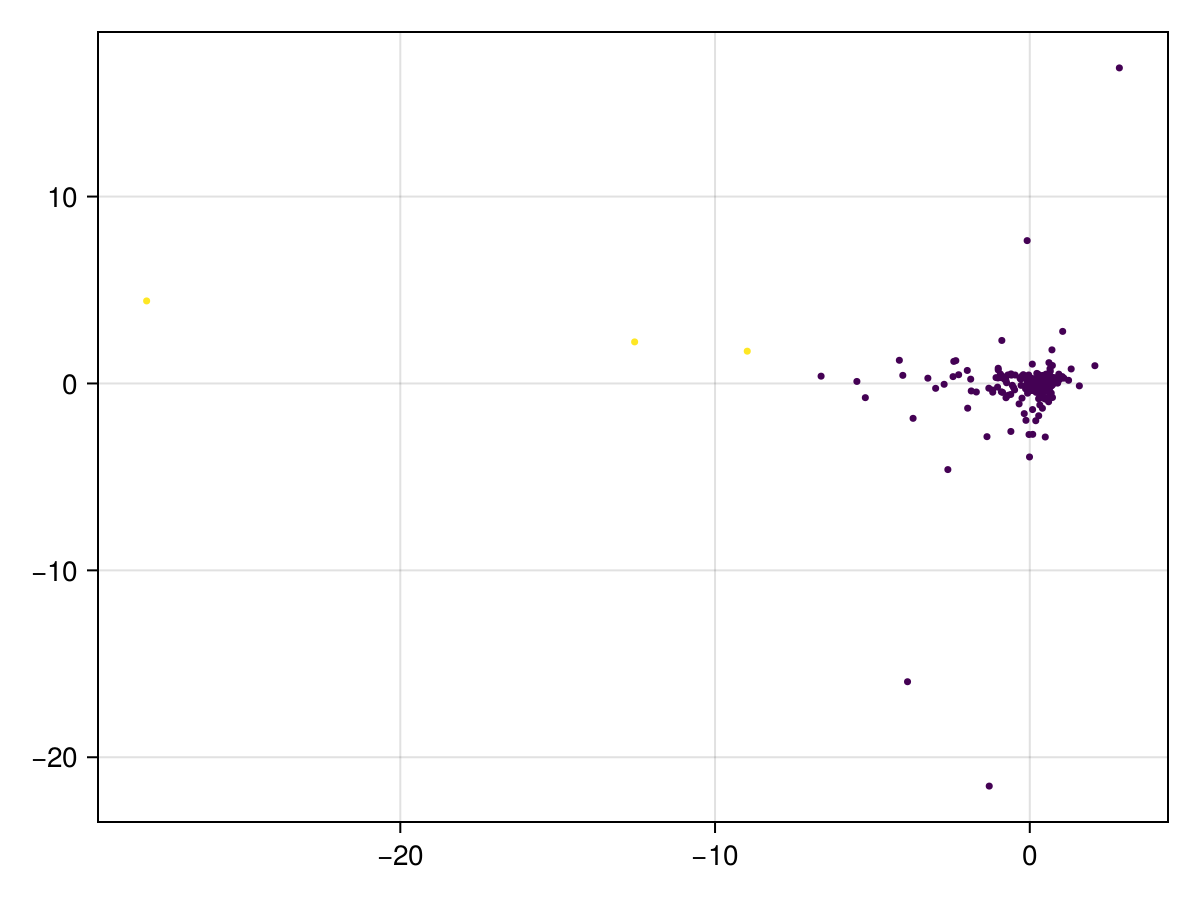

In [19]:
matrix = pairwise(Euclidean(), trees, dims=2)
label = hc_label(matrix, 2)
display(counter(label))
plot_clusters(trees, label)

In [20]:
cluster_1 = Vector{HybridNetwork}()
cluster_2 = Vector{HybridNetwork}() 
for i in 1:length(origin)
    if label[i] == 1
        push!(cluster_1,origin[i])
    else
        push!(cluster_2,origin[i])
    end
end

In [22]:
writeMultiTopology(cluster_1, "../../baobabs/hc_1.trees")
writeMultiTopology(cluster_2, "../../baobabs/hc_2.trees")